# **PREPROCESSING** - Ecoli

## Kriteria Tugas :
1. Download dataset ecoli dari UCI https://archive.ics.uci.edu/dataset/39/ecoli
2. Simpan didatabase MySQL
3. Tampilkan data dalam scatter plot  menggunakan PCA.
   PCA mentransformasi data menjadi dimensi rendah (2)
4. Lakukan penyeimbangan data menggunakan ADASYN
5. Ploting data dari data yang diimbangkan menggunakan PCA, tandai data data hasil generatenya

Penjelasan lebih lengkap mengenai Oversampling : https://hackmd.io/@ProyekSaindData/BJE4Lopsee

## Simpan didatabase MySQL

In [12]:
!pip install pymysql
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
!pip install ucimlrepo



In [13]:
import pymysql

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"  # Ganti host dengan host dari Aiven.io
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "ecoli"

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}  # Jika menggunakan SSL
)

cursor = mysql_conn.cursor()
cursor.execute("SELECT * FROM ecoli.ecoli_data LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
mysql_conn.close()

('AAS_ECOLI', 0.44, 0.52, 0.48, 0.5, 0.43, 0.47, 0.54, 'im')
('AAT_ECOLI', 0.49, 0.29, 0.48, 0.5, 0.56, 0.24, 0.35, 'cp')
('ACEA_ECOLI', 0.07, 0.4, 0.48, 0.5, 0.54, 0.35, 0.44, 'cp')
('ACEK_ECOLI', 0.56, 0.4, 0.48, 0.5, 0.49, 0.37, 0.46, 'cp')
('ACKA_ECOLI', 0.59, 0.49, 0.48, 0.5, 0.52, 0.45, 0.36, 'cp')


## Tampilkan data dalam scatter plot  menggunakan PCA. PCA mentransformasi data menjadi dimensi rendah (2)


/tmp/ipython-input-1323162053.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mysql_conn)


Jumlah data per kelas:
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64


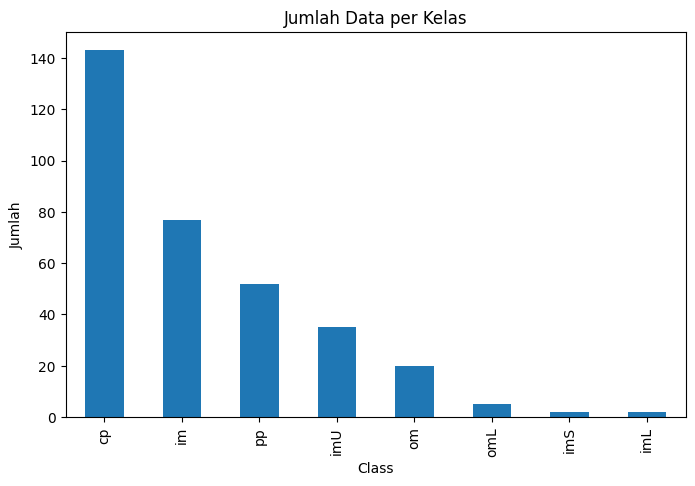

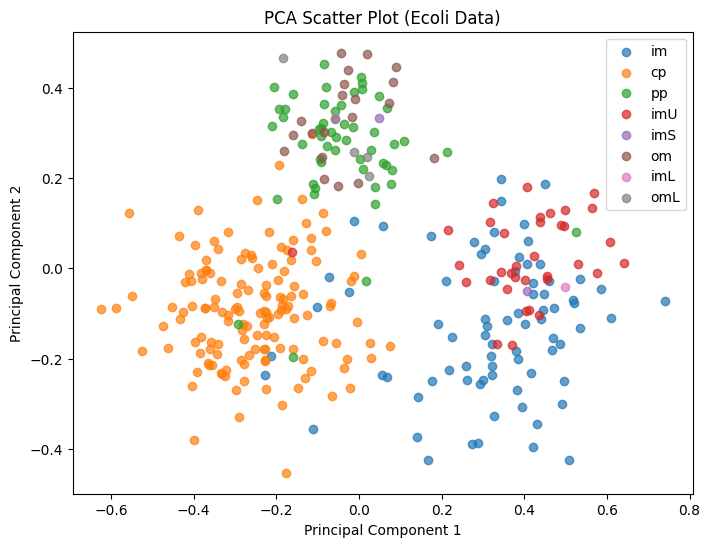

In [14]:
import pymysql
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "defaultdb"

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}
)

# Ambil data ke DataFrame
query = "SELECT * FROM ecoli.ecoli_data;"
df = pd.read_sql(query, mysql_conn)

mysql_conn.close()

# =======================
# Jumlah data per kelas
# =======================
class_counts = df["class"].value_counts()
print("Jumlah data per kelas:")
print(class_counts)

# Bar chart jumlah data per kelas
plt.figure(figsize=(8,5))
class_counts.plot(kind="bar")
plt.title("Jumlah Data per Kelas")
plt.xlabel("Class")
plt.ylabel("Jumlah")
plt.show()

# =======================
# PCA ke 2 dimensi
# =======================
X = df.drop(columns=["Sequence", "class"])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat DataFrame hasil PCA
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = df["class"]

# Scatter plot PCA
plt.figure(figsize=(8,6))
for c in df_pca["class"].unique():
    subset = df_pca[df_pca["class"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=c, alpha=0.7)

plt.title("PCA Scatter Plot (Ecoli Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Install terlebih dulu library pendukung

```!pip install imbalanced-learn```

In [15]:
!pip install imbalanced-learn

## SMOTE

### Penyeimbangan menggunakan Smote

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Misalnya df sudah ada (hasil query MySQL)
# Target = kolom 'class', fitur = selain 'Sequence' & 'class'
X = df.drop(columns=["Sequence", "class"])
y = df["class"]

# Pastikan semua fitur numerik
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# Distribusi awal
print("Distribusi awal:", Counter(y))

smote = SMOTE(random_state=42, k_neighbors=1)  # important: k_neighbors <= number of samples in minority class
X_res, y_res = smote.fit_resample(X, y)

# Distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_res))

Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi setelah SMOTE: Counter({'im': 143, 'cp': 143, 'pp': 143, 'imU': 143, 'imS': 143, 'om': 143, 'imL': 143, 'omL': 143})


### Visualisasi Menggunakan Smote

Distribusi awal (jumlah data per kelas):
cp     143
im      77
imL      2
imS      2
imU     35
om      20
omL      5
pp      52
dtype: int64

Distribusi setelah SMOTE (jumlah data per kelas):
cp     143
im     143
imL    143
imS    143
imU    143
om     143
omL    143
pp     143
dtype: int64


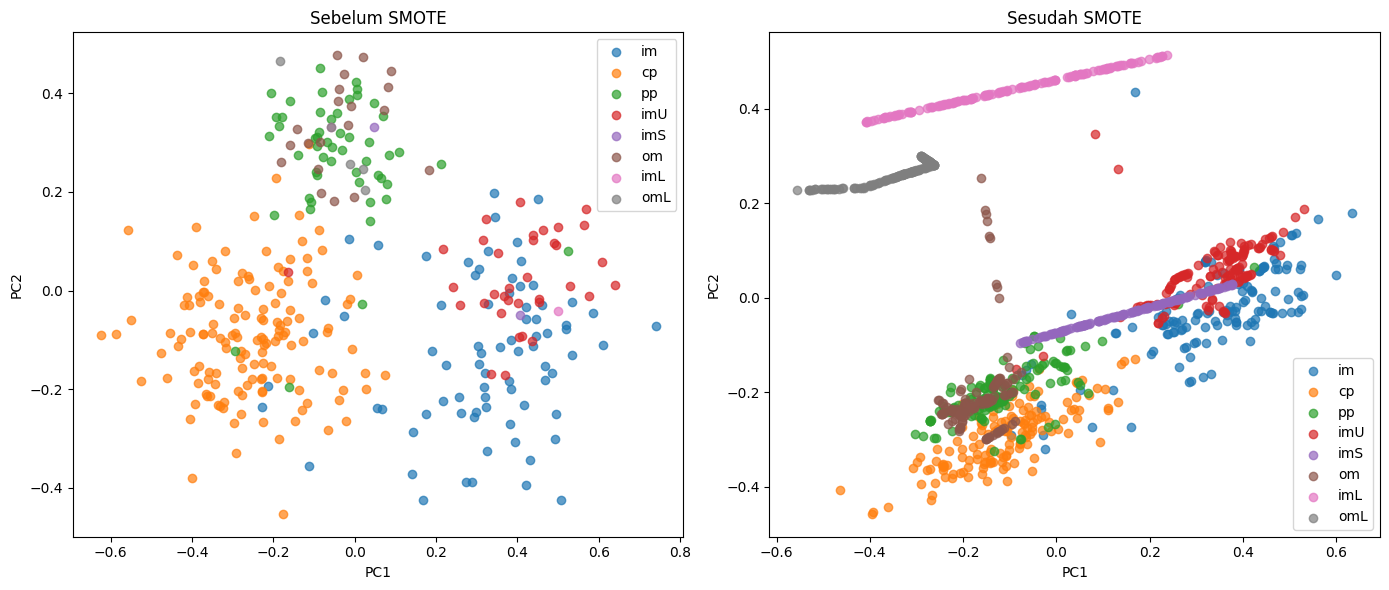

In [17]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Misalnya df sudah ada (hasil query MySQL)
X = df.drop(columns=["Sequence", "class"])
y = df["class"]

# Pastikan numerik
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# =======================
# Distribusi awal
# =======================
print("Distribusi awal (jumlah data per kelas):")
class_counts_before = pd.Series(Counter(y)).sort_index()
print(class_counts_before)

# --- SMOTE ---
smote = SMOTE(random_state=42, k_neighbors=1)  # k_neighbors disesuaikan dataset
X_res, y_res = smote.fit_resample(X, y)

print("\nDistribusi setelah SMOTE (jumlah data per kelas):")
class_counts_after = pd.Series(Counter(y_res)).sort_index()
print(class_counts_after)

# =======================
# PCA untuk visualisasi
# =======================
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X)
X_pca_after = pca.fit_transform(X_res)

# =======================
# Plot
# =======================
plt.figure(figsize=(14,6))

# --- Plot sebelum SMOTE ---
plt.subplot(1,2,1)
for c in pd.Series(y).unique():
    subset = X_pca_before[pd.Series(y)==c]
    plt.scatter(subset[:,0], subset[:,1], label=c, alpha=0.7)
plt.title("Sebelum SMOTE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# --- Plot sesudah SMOTE ---
plt.subplot(1,2,2)
for c in pd.Series(y_res).unique():
    subset = X_pca_after[pd.Series(y_res)==c]
    plt.scatter(subset[:,0], subset[:,1], label=c, alpha=0.7)
plt.title("Sesudah SMOTE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.tight_layout()
plt.show()


## ADASYN

### Penyeimbangan data menggunakan ADASYN

In [43]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import fetch_openml
from imblearn.over_sampling import ADASYN

# Load dataset Ecoli
data = fetch_openml(name="ecoli", version=1, as_frame=True)
df = data.frame

# Split fitur dan target
X = df.drop(columns=["class"])
y = df["class"].copy()

print("✅ Distribusi awal:", Counter(y))

#  Iterasi per kelas → balancing ke mayoritas
class_counts = Counter(y)
max_count = max(class_counts.values())
X_res, y_res = X.copy(), y.copy()

for cls, count in class_counts.items():
    if count < max_count:
        n_neighbors = min(5, count - 1) if count > 1 else 1
        target = {cls: max_count}
        try:
            adasyn = ADASYN(
                n_neighbors=n_neighbors,
                sampling_strategy=target,
                random_state=42
            )
            X_res, y_res = adasyn.fit_resample(X_res, y_res)
            print(f"✅ {cls} di-resample (n_neighbors={n_neighbors}) → {Counter(y_res)[cls]}")
        except Exception as e:
            print(f"❌ {cls} gagal: {e}")

print("\n🎯 Distribusi setelah ADASYN:", Counter(y_res))

# simpan hasil untuk visualisasi
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled["class"] = y_res


✅ Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
✅ im di-resample (n_neighbors=5) → 156
✅ imS di-resample (n_neighbors=1) → 142
✅ imL di-resample (n_neighbors=1) → 142
✅ imU di-resample (n_neighbors=5) → 142
✅ om di-resample (n_neighbors=5) → 146
✅ omL di-resample (n_neighbors=4) → 143
✅ pp di-resample (n_neighbors=5) → 140

🎯 Distribusi setelah ADASYN: Counter({'im': 156, 'om': 146, 'cp': 143, 'omL': 143, 'imS': 142, 'imL': 142, 'imU': 142, 'pp': 140})


### Visualisasi ADASYN menggunakan PCA

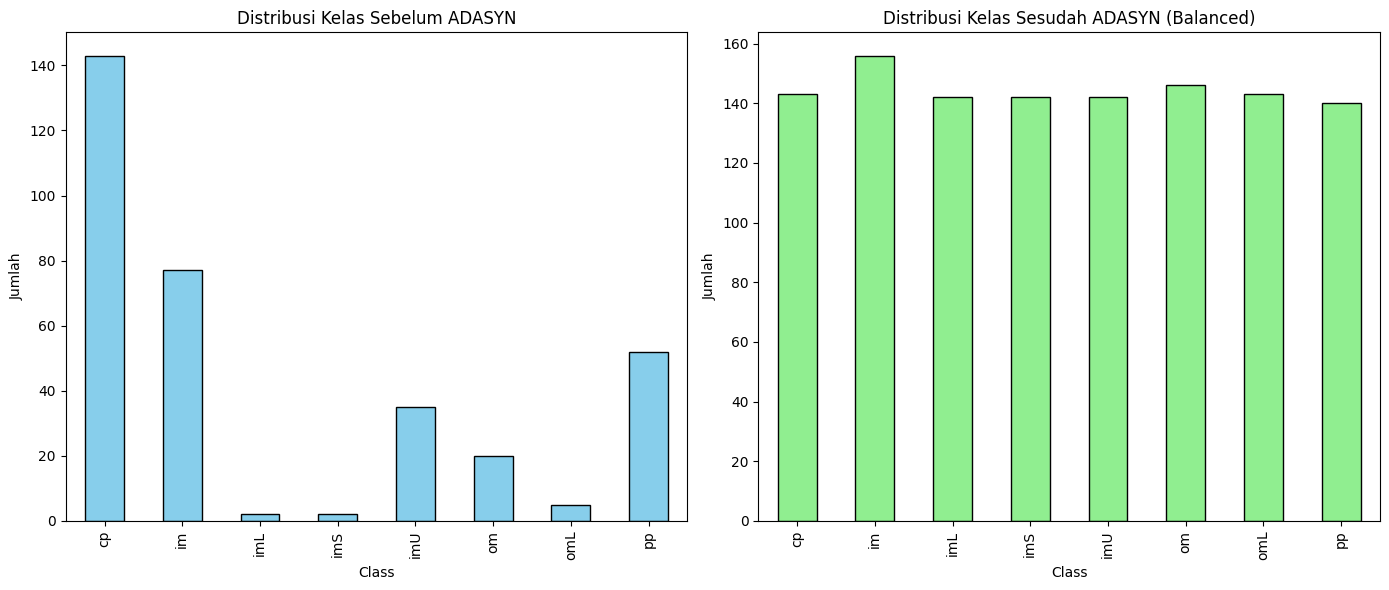

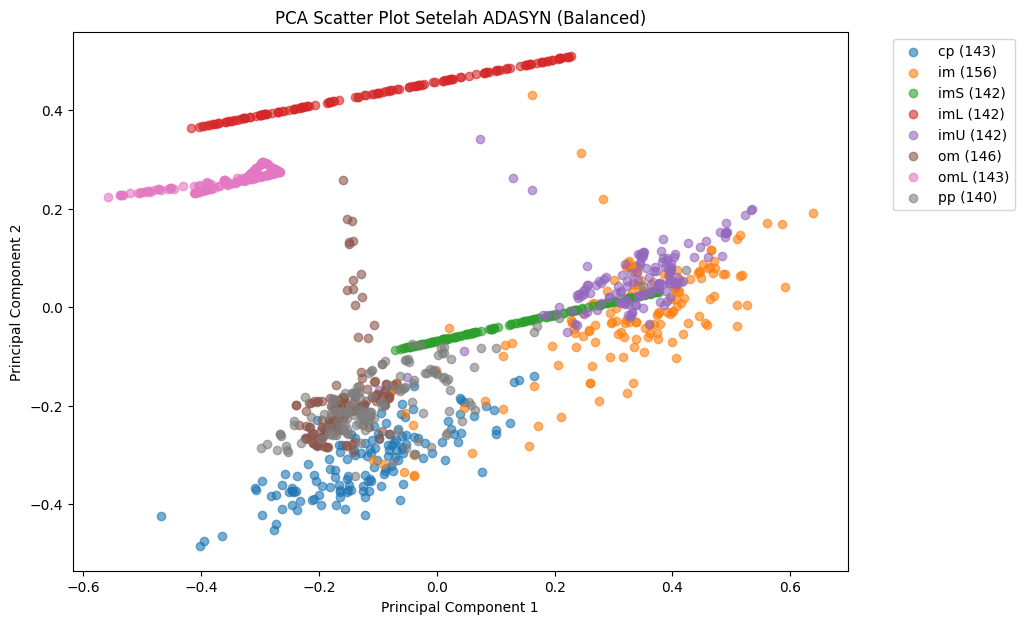

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Plot distribusi sebelum & sesudah
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sebelum
pd.Series(y).value_counts().sort_index().plot(
    kind="bar", ax=axes[0], color="skyblue", edgecolor="black"
)
axes[0].set_title("Distribusi Kelas Sebelum ADASYN")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Jumlah")

# Sesudah
pd.Series(df_resampled["class"]).value_counts().sort_index().plot(
    kind="bar", ax=axes[1], color="lightgreen", edgecolor="black"
)
axes[1].set_title("Distribusi Kelas Sesudah ADASYN (Balanced)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

# 5. PCA Visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_resampled.drop(columns=["class"]))

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = df_resampled["class"]

plt.figure(figsize=(10, 7))
for c in df_pca["class"].unique():
    subset = df_pca[df_pca["class"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"{c} ({len(subset)})", alpha=0.6)

plt.title("PCA Scatter Plot Setelah ADASYN (Balanced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## Klasifikasi menggunakan Naive Bayes

### Klasifikasi dengan data yang belum diseimbangkan

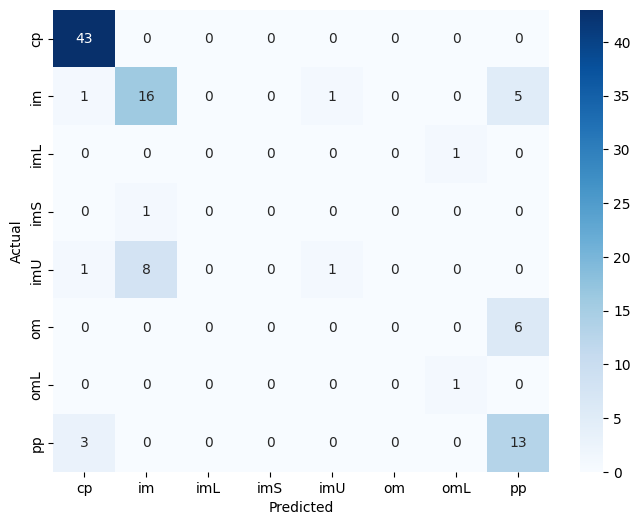

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


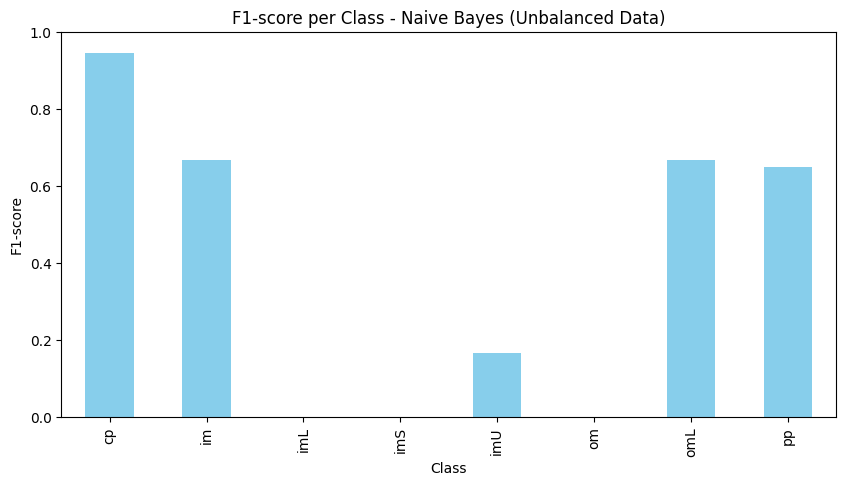

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Data awal (belum diseimbangkan) ---
# Drop the first column by index instead of by name
X_unbalanced = df.drop(columns=[df.columns[0], "class"])
y_unbalanced = df["class"]

# Split data train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_unbalanced, y_unbalanced, test_size=0.3, random_state=42, stratify=y_unbalanced
)

# Model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi
y_pred = nb.predict(X_test)

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === Classification report → DataFrame ===
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Bar chart F1-score per kelas
df_report[:-3]["f1-score"].plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("F1-score per Class - Naive Bayes (Unbalanced Data)")
plt.ylabel("F1-score")
plt.xlabel("Class")
plt.ylim(0,1)
plt.show()

In [50]:
from sklearn.metrics import accuracy_score

# Hitung akurasi keseluruhan
accuracy = accuracy_score(y_test, y_pred)
print("✅ Akurasi Naive Bayes:", round(accuracy, 4))


✅ Akurasi Naive Bayes: 0.7327


### Klasifikasi dengan data yang diseimbangkan dengan SMOTE

Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi setelah SMOTE: Counter({'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143})

=== Confusion Matrix ===
[[43  0  0  0  0  0  0  0]
 [ 2  4  0  1 27  0  0  9]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 6  2  1  2 30  0  0  2]
 [ 0  0  0  0  0 17  0 26]
 [ 0  0  0  0  0  0 43  0]
 [ 4  0  0  0  0  0  0 39]]

=== Classification Report ===
              precision    recall  f1-score   support

          cp       0.78      1.00      0.88        43
          im       0.67      0.09      0.16        43
         imL       0.98      1.00      0.99        43
         imS       0.93      1.00      0.97        43
         imU       0.53      0.70      0.60        43
          om       1.00      0.40      0.57        43
         omL       1.00      1.00      1.00        43
          pp       0.51      0.91      0.66        43

 

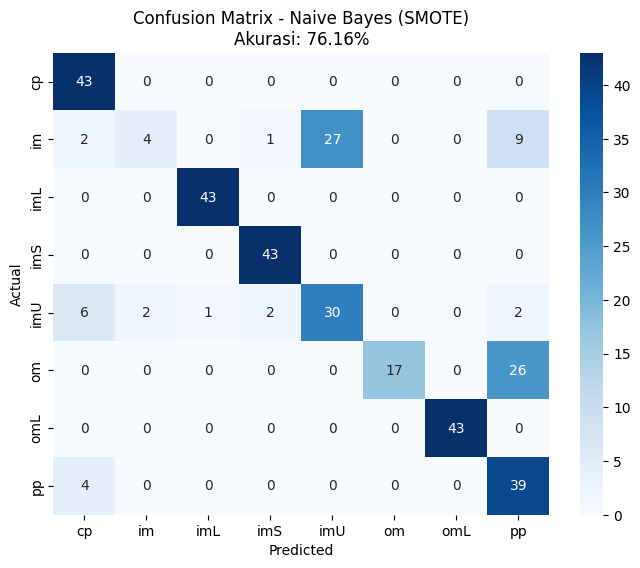

In [58]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Data awal ---
# X = df.drop(columns=["Sequence", "class"])
X = df.drop(columns=[df.columns[0], "class"]) # Drop first column by index
y = df["class"]

# Pastikan numerik
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# Distribusi awal
print("Distribusi awal:", Counter(y))

# --- Oversampling dengan SMOTE ---
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_res))

# --- Split data train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# --- Naive Bayes ---
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# --- Evaluasi ---
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# --- Visualisasi Confusion Matrix ---
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Naive Bayes (SMOTE)\nAkurasi: {accuracy*100:.2f}%")
plt.show()

In [67]:
# --- Akurasi ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Akurasi (sesudah SMOTE): {accuracy*100:.2f}% ===")


=== Akurasi (sesudah SMOTE): 76.08% ===


### Klasifikasi dengan data yang diseimbangkan dengan ADASYN

✅ Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
✅ im di-resample (n_neighbors=5) → 156
✅ imS di-resample (n_neighbors=1) → 142
✅ imL di-resample (n_neighbors=1) → 142
✅ imU di-resample (n_neighbors=5) → 142
✅ om di-resample (n_neighbors=5) → 146
✅ omL di-resample (n_neighbors=4) → 143
✅ pp di-resample (n_neighbors=5) → 140

🎯 Distribusi setelah ADASYN: Counter({'im': 156, 'om': 146, 'cp': 143, 'omL': 143, 'imS': 142, 'imL': 142, 'imU': 142, 'pp': 140})

📊 Akurasi Naive Bayes setelah ADASYN: 76.08%

=== Classification Report ===
              precision    recall  f1-score   support

          cp       0.86      1.00      0.92        43
          im       0.82      0.30      0.44        47
         imL       1.00      1.00      1.00        42
         imS       0.91      1.00      0.96        43
         imU       0.67      0.72      0.70        43
          om       1.00      0.23      0.37        44
         omL       1.00 

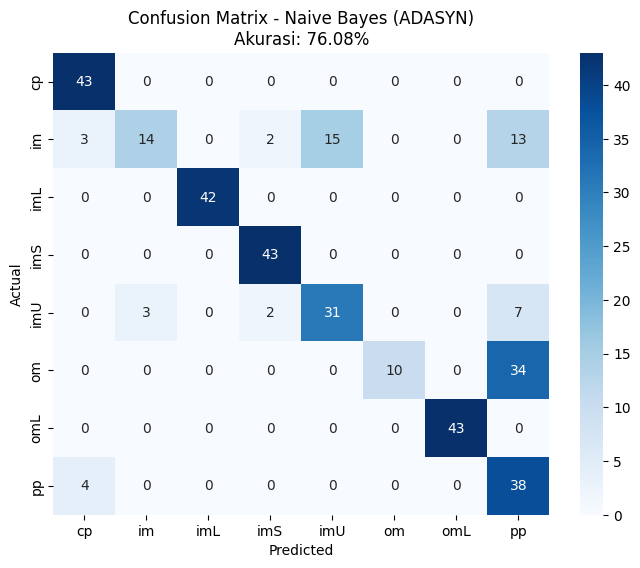

In [64]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import fetch_openml
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# =====================================
# 1. Load dataset Ecoli
# =====================================
data = fetch_openml(name="ecoli", version=1, as_frame=True)
df = data.frame

# Split fitur dan target
X = df.drop(columns=["class"])
y = df["class"].copy()

print("✅ Distribusi awal:", Counter(y))

# =====================================
# 2. Oversampling ADASYN adaptif
# =====================================
class_counts = Counter(y)
max_count = max(class_counts.values())
X_res, y_res = X.copy(), y.copy()

for cls, count in class_counts.items():
    if count < max_count:
        n_neighbors = min(5, count - 1) if count > 1 else 1
        target = {cls: max_count}
        try:
            adasyn = ADASYN(
                n_neighbors=n_neighbors,
                sampling_strategy=target,
                random_state=42
            )
            X_res, y_res = adasyn.fit_resample(X_res, y_res)
            print(f"✅ {cls} di-resample (n_neighbors={n_neighbors}) → {Counter(y_res)[cls]}")
        except Exception as e:
            print(f"❌ {cls} gagal: {e}")

print("\n🎯 Distribusi setelah ADASYN:", Counter(y_res))

# =====================================
# 3. Split train/test
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# =====================================
# 4. Naive Bayes Classification
# =====================================
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Akurasi Naive Bayes setelah ADASYN: {accuracy*100:.2f}%\n")

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Naive Bayes (ADASYN)\nAkurasi: {accuracy*100:.2f}%")
plt.show()


In [65]:
# === Akurasi ===
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Akurasi (dengan ADASYN): {accuracy*100:.2f}% ===")



=== Akurasi (dengan ADASYN): 76.08% ===


## Klasfikasi menggunakan Random Forest

### Klasifikasi dengan data yang belum diseimbangkan

/tmp/ipython-input-2255416730.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mysql_conn)


Jumlah data per kelas:
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64


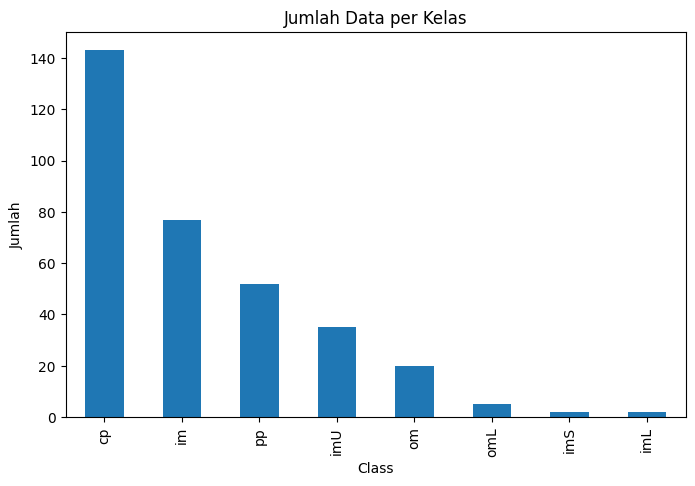

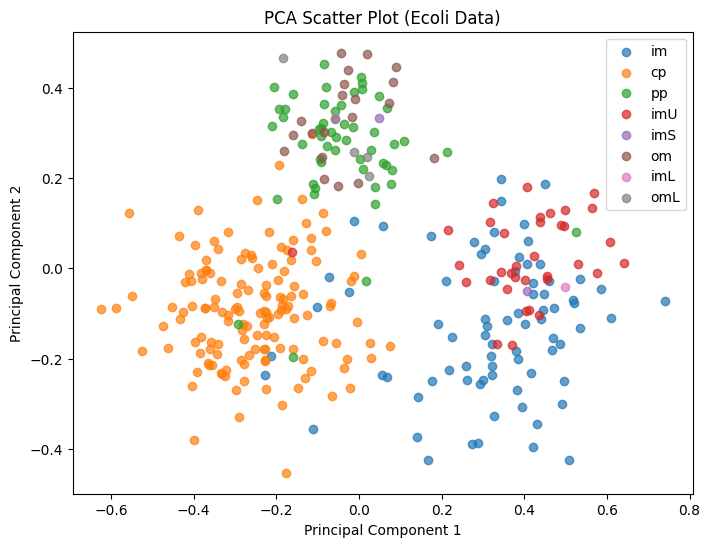


=== Evaluasi Random Forest ===
Accuracy: 0.8970588235294118

Classification Report:
               precision    recall  f1-score   support

          cp       0.97      1.00      0.98        29
          im       0.79      0.94      0.86        16
         imU       0.75      0.43      0.55         7
          om       1.00      0.75      0.86         4
         omL       1.00      1.00      1.00         1
          pp       0.91      0.91      0.91        11

    accuracy                           0.90        68
   macro avg       0.90      0.84      0.86        68
weighted avg       0.90      0.90      0.89        68


Confusion Matrix:
 [[29  0  0  0  0  0]
 [ 0 15  1  0  0  0]
 [ 0  4  3  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0 10]]


In [70]:
import pymysql
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# =======================
# Koneksi ke database
# =======================
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "defaultdb"

mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}
)

query = "SELECT * FROM ecoli.ecoli_data;"
df = pd.read_sql(query, mysql_conn)
mysql_conn.close()

# =======================
# Jumlah data per kelas
# =======================
class_counts = df["class"].value_counts()
print("Jumlah data per kelas:")
print(class_counts)

plt.figure(figsize=(8,5))
class_counts.plot(kind="bar")
plt.title("Jumlah Data per Kelas")
plt.xlabel("Class")
plt.ylabel("Jumlah")
plt.show()

# =======================
# PCA ke 2 dimensi
# =======================
X = df.drop(columns=["Sequence", "class"])
y = df["class"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = y

plt.figure(figsize=(8,6))
for c in df_pca["class"].unique():
    subset = df_pca[df_pca["class"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=c, alpha=0.7)

plt.title("PCA Scatter Plot (Ecoli Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# =======================
# Random Forest Classification
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluasi
print("\n=== Evaluasi Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


### Klasifikasi menggunakan data yang diseimbangkan dengan SMOTE

Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi setelah SMOTE: Counter({'im': 143, 'cp': 143, 'pp': 143, 'imU': 143, 'imS': 143, 'om': 143, 'imL': 143, 'omL': 143})

=== Classification Report ===
              precision    recall  f1-score   support

          cp       0.90      1.00      0.95        28
          im       0.93      0.93      0.93        28
         imL       0.97      1.00      0.98        29
         imS       1.00      1.00      1.00        29
         imU       1.00      0.93      0.96        29
          om       1.00      1.00      1.00        28
         omL       1.00      1.00      1.00        29
          pp       1.00      0.93      0.96        29

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.98      0.97      0.97       229



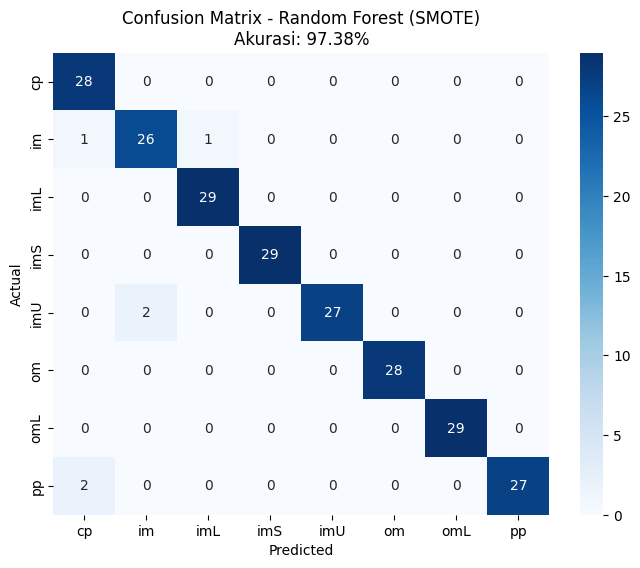

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

# ============================
# 1. Fitur & Target
# ============================
X = df.drop(columns=["Sequence", "class"])
y = df["class"]

print("Distribusi awal:", Counter(y))

# ============================
# 2. SMOTE Balancing
# ============================
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_res))

# ============================
# 3. Train-Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# ============================
# 4. Random Forest
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred = rf.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Random Forest (SMOTE)\nAkurasi: {accuracy*100:.2f}%")
plt.show()


In [74]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest setelah SMOTE: {accuracy:.4f}")


Akurasi Random Forest setelah SMOTE: 0.9738


### Klasifikasi menggunakan data yang diseimbangkan dengan ADASYN

Akurasi Random Forest (ADASYN, Balanced): 0.9481

=== Classification Report ===
              precision    recall  f1-score   support

          cp       0.88      1.00      0.94        29
          im       0.90      0.87      0.89        31
         imL       1.00      1.00      1.00        28
         imS       0.97      1.00      0.98        28
         imU       0.89      0.86      0.88        29
          om       1.00      1.00      1.00        29
         omL       1.00      1.00      1.00        29
          pp       0.96      0.86      0.91        28

    accuracy                           0.95       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231



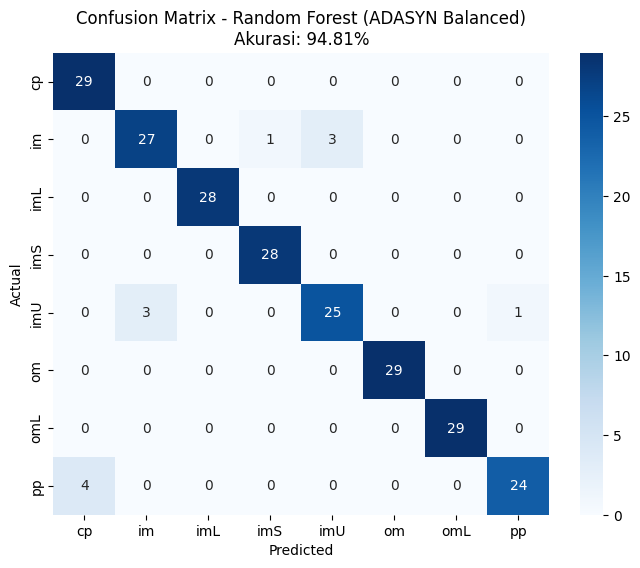

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# ============================
# 1. Dataset hasil ADASYN (sudah balance)
# ============================
# Asumsikan df_resampled adalah hasil ADASYN
X = df_resampled.drop(columns=["class"])
y = df_resampled["class"]

# ============================
# 2. Train-Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
# 3. Random Forest
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred = rf.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Random Forest (ADASYN Balanced)\nAkurasi: {accuracy*100:.2f}%")
plt.show()


In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest setelah ADASYN: {accuracy:.4f}")


Akurasi Random Forest setelah ADASYN: 0.9481


## Bagging Clasifier

### Bagging sebelum balancing

In [81]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ===============================
# 1. Load data dari dataframe df
# ===============================
X = df.drop(columns=[df.columns[0], "class"])  # drop kolom pertama + class
y = df["class"]

# Pastikan numerik
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# ===============================
# 2. Split data train/test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ===============================
# 3. Bagging sebelum balancing
# ===============================
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)

print("📊 Akurasi BaggingClassifier (sebelum balancing):", round(acc_before, 4))


📊 Akurasi BaggingClassifier (sebelum balancing): 0.8515


### Bagging sesudah SMOTE

In [82]:
from imblearn.over_sampling import SMOTE

# ===============================
# 4. Bagging sesudah SMOTE
# ===============================
smote = SMOTE(random_state=42, k_neighbors=1)
X_sm, y_sm = smote.fit_resample(X, y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm
)

bagging_sm = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = bagging_sm.predict(X_test_sm)
acc_smote = accuracy_score(y_test_sm, y_pred_sm)

print("📊 Akurasi BaggingClassifier (setelah SMOTE):", round(acc_smote, 4))


📊 Akurasi BaggingClassifier (setelah SMOTE): 0.9448


### Bagging dengan ADASYN

catatan : ADASYN gagal dipakai di dataset karena saat mencari tetangga (n_neighbors) tidak ada satupun sampel mayoritas di sekitar minoritas → akhirnya division by zero.

In [87]:
from imblearn.over_sampling import ADASYN, RandomOverSampler

try:
    adasyn = ADASYN(random_state=42, n_neighbors=1)
    X_ad, y_ad = adasyn.fit_resample(X, y)
    print("✅ ADASYN berhasil dijalankan")
except RuntimeError as e:
    print(f"⚠️ ADASYN gagal ({e}), fallback ke RandomOverSampler")
    ros = RandomOverSampler(random_state=42)
    X_ad, y_ad = ros.fit_resample(X, y)

# train/test split
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    X_ad, y_ad, test_size=0.3, random_state=42, stratify=y_ad
)

bagging_ad = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_ad.fit(X_train_ad, y_train_ad)
y_pred_ad = bagging_ad.predict(X_test_ad)
acc_adasyn = accuracy_score(y_test_ad, y_pred_ad)

print(f"Akurasi Bagging (ADASYN/ROS): {acc_adasyn:.4f}")


⚠️ ADASYN gagal (Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.), fallback ke RandomOverSampler
Akurasi Bagging (ADASYN/ROS): 0.9797


## Hasil Perbandingan


📊 Laporan Akurasi Keseluruhan:

                        Model  Accuracy
0    Naive Bayes (Unbalanced)    0.7327
1         Naive Bayes (SMOTE)    0.7608
2        Naive Bayes (ADASYN)    0.7608
3  Random Forest (Unbalanced)    0.8970
4       Random Forest (SMOTE)    0.9738
5      Random Forest (ADASYN)    0.9481
6        Bagging (Unbalanced)    0.9262
7             Bagging (SMOTE)    0.9797
8        Bagging (ADASYN/ROS)    0.9797


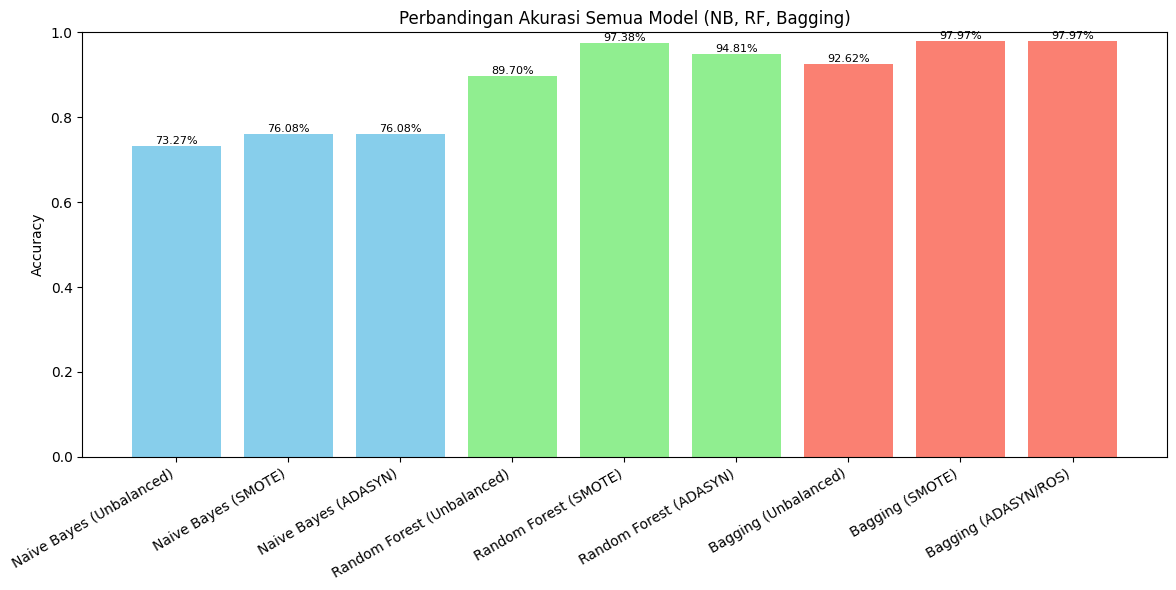

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# ========================
# Data akurasi (manual input dari hasil kamu)
# ========================
data = {
    "Model": [
        "Naive Bayes (Unbalanced)",
        "Naive Bayes (SMOTE)",
        "Naive Bayes (ADASYN)",
        "Random Forest (Unbalanced)",
        "Random Forest (SMOTE)",
        "Random Forest (ADASYN)",
        "Bagging (Unbalanced)",
        "Bagging (SMOTE)",
        "Bagging (ADASYN/ROS)"
    ],
    "Accuracy": [
        0.7327,
        0.7608,
        0.7608,
        0.8970,
        0.9738,
        0.9481,
        0.9262,
        0.9797,
        0.9797
    ]
}

df_acc = pd.DataFrame(data)

# ========================
# Cetak tabel
# ========================
print("\n📊 Laporan Akurasi Keseluruhan:\n")
print(df_acc)

# ========================
# Plot bar chart perbandingan
# ========================
plt.figure(figsize=(12,6))
bars = plt.bar(df_acc["Model"], df_acc["Accuracy"],
               color=["skyblue"]*3 + ["lightgreen"]*3 + ["salmon"]*3)
plt.title("Perbandingan Akurasi Semua Model (NB, RF, Bagging)")
plt.ylabel("Accuracy")
plt.ylim(0,1)

# Label persentase di atas bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height()*100:.2f}%", ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()
